In this notebook we will explore the data and make observations on raw dataset without making any transformations to the data. All the transformations and changes will be done in cleaning and feature engineering file

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import stats

from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings

pd.set_option('display.float_format', '{:.6f}'.format)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

In [5]:
# Functions

# Cramér’s V — a statistic that measures the strength of association between two categorical variables.
def cramer_v(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    chi2 = stats.chi2_contingency( cm )[0]
    chi2corr = max(0, chi2 - (k - 1) * (r - 1) / (n - 1) )
    kcorr = k - (k - 1) ** 2 / (n - 1)
    rcorr = r - (r - 1) ** 2 / (n - 1)
    return np.sqrt((chi2corr / n) / ( min(kcorr - 1, rcorr - 1 )))
    
"""
It ranges from:

0 → no association

1 → very strong association
Cramér’s V	Meaning
0 – 0.1	negligible
0.1 – 0.3	weak
0.3 – 0.5	moderate
> 0.5	strong

This helps you:

✅ drop useless categorical features
✅ detect leakage
✅ find strong predictors
"""

'\nIt ranges from:\n\n0 → no association\n\n1 → very strong association\nCramér’s V\tMeaning\n0 – 0.1\tnegligible\n0.1 – 0.3\tweak\n0.3 – 0.5\tmoderate\n> 0.5\tstrong\n\nThis helps you:\n\n✅ drop useless categorical features\n✅ detect leakage\n✅ find strong predictors\n'

In [6]:
df = pd.read_csv(r"C:\Users\user\Desktop\BIA Insurance Prediction Project\data\data.csv")

# checking first 10 samples
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.000000,0,> 2 Years,Yes,40454.000000,26.000000,217,1
1,2,Male,76,1,3.000000,0,1-2 Year,No,33536.000000,26.000000,183,0
2,3,Male,47,1,28.000000,0,> 2 Years,Yes,38294.000000,26.000000,27,1
3,4,Male,21,1,11.000000,1,< 1 Year,No,28619.000000,152.000000,203,0
4,5,Female,29,1,41.000000,1,< 1 Year,No,27496.000000,152.000000,39,0
5,6,Female,24,1,33.000000,0,< 1 Year,Yes,2630.000000,160.000000,176,0
6,7,Male,23,1,11.000000,0,< 1 Year,Yes,23367.000000,152.000000,249,0
7,8,Female,56,1,28.000000,0,1-2 Year,Yes,32031.000000,26.000000,72,1
8,9,Female,24,1,3.000000,1,< 1 Year,No,27619.000000,152.000000,28,0
9,10,Female,32,1,6.000000,1,< 1 Year,No,28771.000000,152.000000,80,0


In [7]:
df.shape

(381109, 12)

In [8]:
#displaying all attributes in the dataset
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
#Dataset information: displays non null value counts in each column and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


- There are no null objects observed in the dataset

- 'Gender', 'Vehicle Age' and 'Vehicle Damage' are non-numerical in nature

- Column 'id' can dropped as it is irrelevant

In [10]:
# checking if there are any missing values
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
#dropping ID as it isnt relevant to the customer's response
df.drop('id', axis =1, inplace = True)

In [12]:
# checking if there are any duplicated values
df.duplicated().sum()

269

- There are 269 duplicates identified in the dataset

- These duplicates will be dropped

In [13]:
#dropping duplicate values from the dataset
df = df.drop_duplicates(keep='first')

In [14]:
# displaying all the vehicle ages
df.Vehicle_Age.value_counts()

Vehicle_Age
1-2 Year     200167
< 1 Year     164671
> 2 Years     16002
Name: count, dtype: int64

In [15]:
df.Vehicle_Age.value_counts()*100/df.shape[0]

Vehicle_Age
1-2 Year    52.559343
< 1 Year    43.238893
> 2 Years    4.201765
Name: count, dtype: float64

In [16]:
# distribution split 
df.Response.value_counts()*100/df.shape[0]

Response
0   87.741571
1   12.258429
Name: count, dtype: float64

#### Inference:

 - There is an imbalance and we need to address it. 

 - Avoid accuracy as if when the model predicts all the cases to be 0, it will still be about 88% accurate.

 - We need to focus on Precison, recall and AUC-ROC curve. In insurance, you'd rather accidentally call someone who isn't interested (False Positive) than miss a high-value customer who is interested (False Negative).

 - Monitor the Confusion Matrix: Watch the bottom-right square (True Positives). If that number is near zero, your model is failing to learn the "Response" patterns.

 - We can use 2 methods to counter the imbalance. Using Class weights and smote.

 - class weights tell the models to pay more attention to the minortiy class, penalizing the models more when it classfiers a 'yes'


In [17]:
# descriptive statics for numerical attributes

num_cols = ['Annual_Premium','Policy_Sales_Channel', 'Vintage','Age']


data_statistics = df[num_cols].describe().reset_index()
skew = pd.DataFrame(df[num_cols].apply(lambda x: x.skew())).T
data_statistics = pd.concat([data_statistics, skew]).fillna('Skew')
kurtosis = pd.DataFrame(df[num_cols].apply(lambda x: x.kurtosis())).T
data_statistics = pd.concat([data_statistics, kurtosis]).fillna('Kurtosis')
data_statistics.set_index('index')
data_statistics

,index,Annual_Premium,Policy_Sales_Channel,Vintage,Age
0,count,380840.000000,380840.000000,380840.000000,380840.000000
1,mean,30584.016078,112.030225,154.344607,38.823593
2,std,17203.258664,54.206194,83.670240,15.513206
3,min,2630.000000,1.000000,10.000000,20.000000
4,25%,24426.000000,29.000000,82.000000,25.000000
5,50%,31678.500000,133.000000,154.000000,36.000000
6,75%,39408.000000,152.000000,227.000000,49.000000
7,max,540165.000000,163.000000,299.000000,85.000000
0,Skew,1.769976,-0.899836,0.003051,0.672495
0,Kurtosis,34.103012,-0.971141,-1.200612,-0.565984


## Skewness and Kurtosis in Machine Learning (Practical Guide)

### Skewness (Distribution Asymmetry)

Skew tells you whether your data is symmetric or tilted.

- Skew = 0  → Symmetric (approximately normal)
- Skew > 0  → Right-skewed (long right tail, few very large values)
- Skew < 0  → Left-skewed (long left tail)

---

### Why Skew Matters in ML

Highly skewed data causes problems for many models:

- Linear Regression  
- Logistic Regression  
- KNN  
- SVM  
- PCA  

These models generally assume roughly normal or well-scaled feature distributions.

---

### Handling Strong Skew

Rule of thumb:

- If skew > 1 or skew < -1 → apply transformations

Example:

```python
insurance_data1['annual_premium_log'] = np.log1p(
    insurance_data1['annual_premium']
)


we need to transform categroies with skewness and kurtosis to be normal in order to get better results

In [18]:
numeric_features = ['Age','Annual_Premium', 'Vintage'] # numerical features
cat_encoded_feature = ['Policy_Sales_Channel','Region_Code'] # categorical features that were encoded numerically
cat_label_features = ['Vehicle_Age', 'Gender' ,'Vehicle_Damage','Driving_License','Previously_Insured', 'Response'] # categorical features

In [ ]:
def value_count_norm_cal(df,feature):
    '''
    Function that will return the value count and frequency of each observation within a feature
    '''
    ftr_value_cnt = df[feature].value_counts()
    # normalize the value count
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [20]:
def create_hist_plot(df,feature, the_bins=50):
    '''
    function to create a histogram plot
    '''
    fig, ax = plt.subplots(figsize=(18,10))
    sns.histplot(df[feature],bins=the_bins,kde=True)
    plt.title('{} distribution'.format(feature))
    return plt.show()

In [21]:
def create_bar_plot(df,feature):
    '''
    function to create a bar chart plot
    '''
    
    fig, ax = plt.subplots(figsize=(6,10))
    sns.barplot(x=value_count_norm_cal(df,feature).index,y=value_count_norm_cal(df,feature).values[:,0])
    plt.xlabel('{}'.format(feature))
    plt.ylabel('Count')
    plt.xticks(rotation=45,ha='right')
    plt.title('{} count'.format(feature))
    return plt.show()

In [22]:
def create_box_plot(df,feature):
    '''
    function to create a box plot
    '''
    fig, ax = plt.subplots(figsize=(2,8))
    sns.boxplot(y=df[feature])
    plt.title('{} distribution(Boxplot)'.format(feature))
    return plt.show()

In [23]:
def gen_info_feat(df,feature):
    '''
    function to create display general information about the feature
    '''
    match feature:
        case 'Age' | 'Annual_Premium' | 'Vintage':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            print('Skewness:\n{}'.format(df[feature].skew()))
            print('*'*50)
            print('kurtosis:\n{}'.format(df[feature].kurtosis()))
            create_hist_plot(df,feature, the_bins=50)
            create_box_plot(df,feature)
        
        case 'Region_Code' | 'Policy_Sales_Channel':
            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            
        case _:

            print('Description:\n{}'.format(df[feature].describe()))
            print('*'*50)
            print('Object type:\n{}'.format(df[feature].dtype))
            print('*'*50)
            value_cnt = value_count_norm_cal(df,feature)
            print('Value count:\n{}'.format(value_cnt))
            create_bar_plot(df,feature)
    print('*'*50)
    print()

In [24]:
def missing_val_norm(df,feature):
    feat_nan_count = df[feature].isnull().sum()
    rows_count = df.shape[0]
    return 'The percentage of missing rows is {:.2f} %'.format(feat_nan_count * 100 / rows_count)

#### Univariate Analysis

Age
Description:
count   380840.000000
mean        38.823593
std         15.513206
min         20.000000
25%         25.000000
50%         36.000000
75%         49.000000
max         85.000000
Name: Age, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.6724953423629682
**************************************************
kurtosis:
-0.5659837829761245


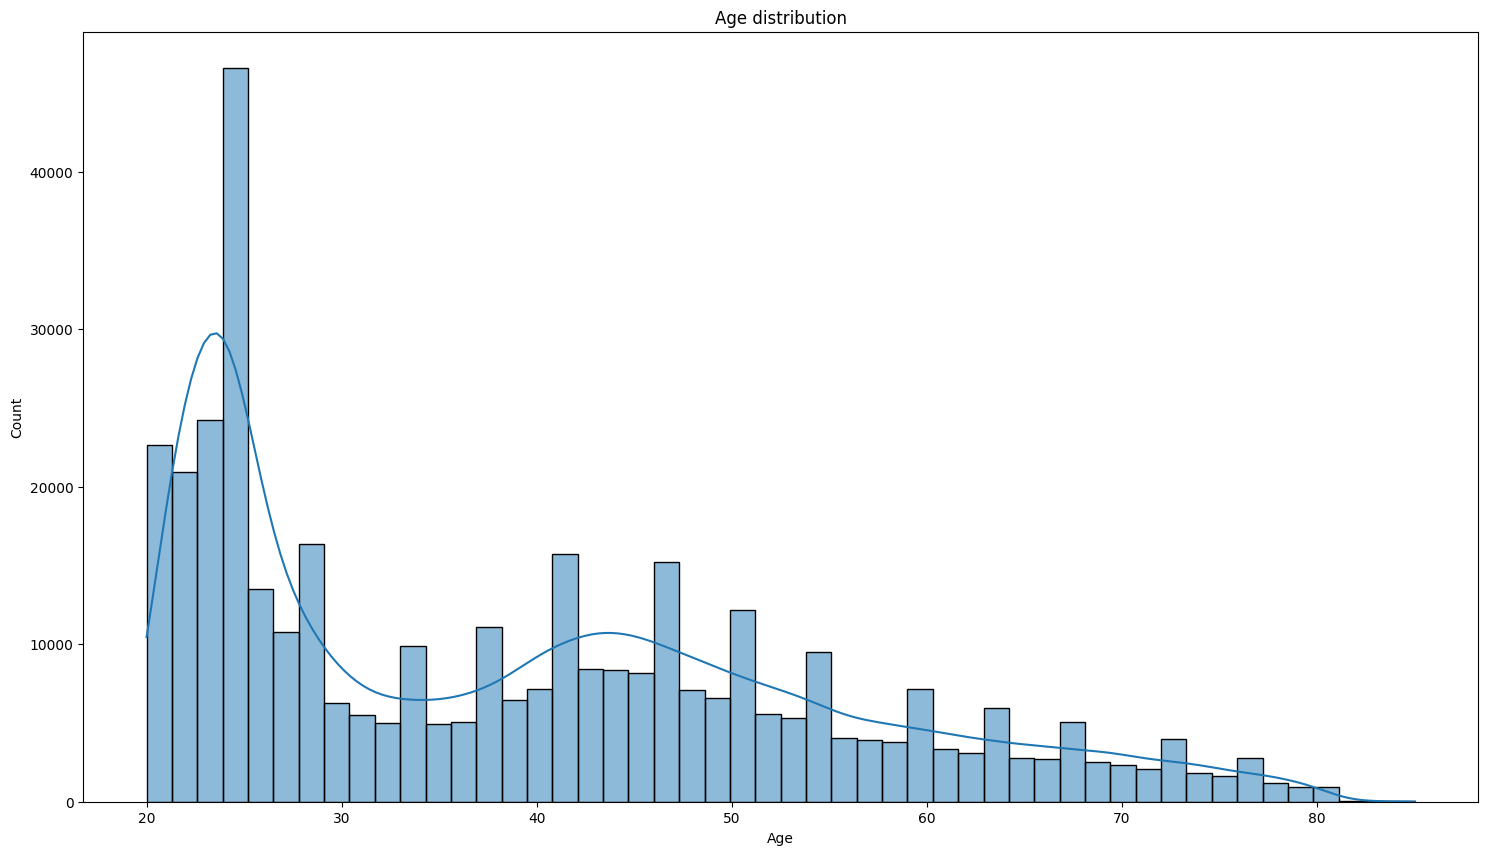

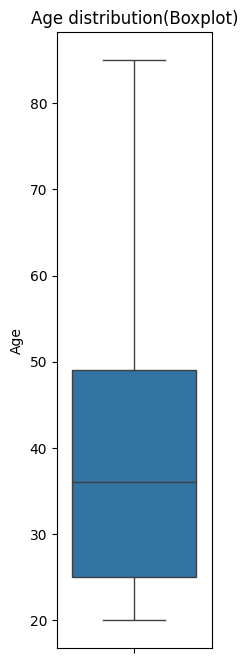

**************************************************

Annual_Premium
Description:
count   380840.000000
mean     30584.016078
std      17203.258664
min       2630.000000
25%      24426.000000
50%      31678.500000
75%      39408.000000
max     540165.000000
Name: Annual_Premium, dtype: float64
**************************************************
Object type:
float64
**************************************************
Skewness:
1.7699758877598497
**************************************************
kurtosis:
34.10301190861813


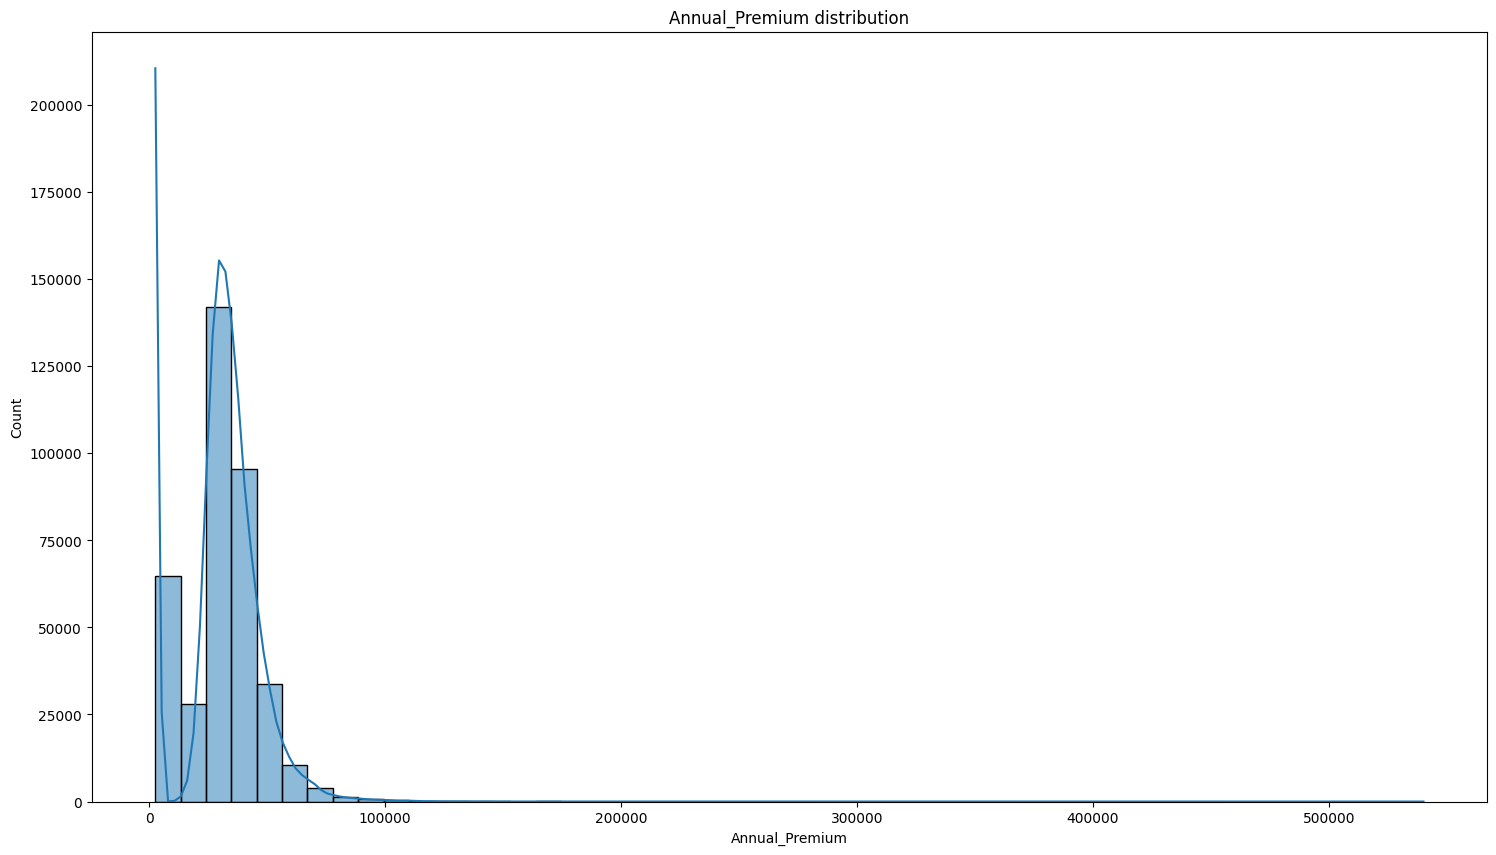

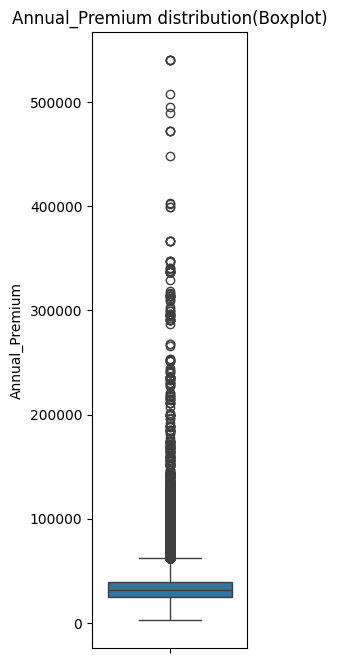

**************************************************

Vintage
Description:
count   380840.000000
mean       154.344607
std         83.670240
min         10.000000
25%         82.000000
50%        154.000000
75%        227.000000
max        299.000000
Name: Vintage, dtype: float64
**************************************************
Object type:
int64
**************************************************
Skewness:
0.00305128680797489
**************************************************
kurtosis:
-1.2006124632989013


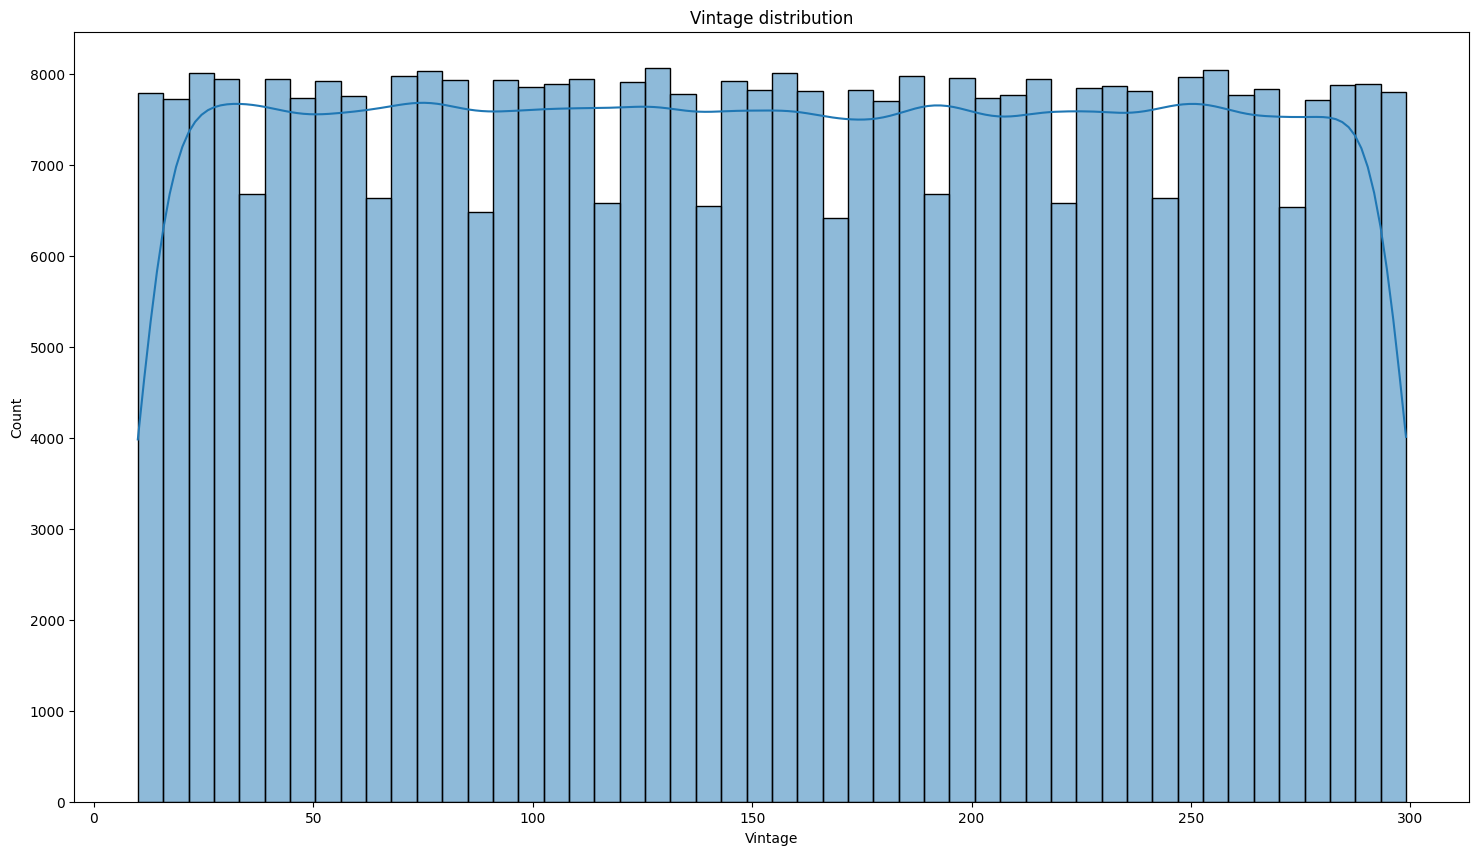

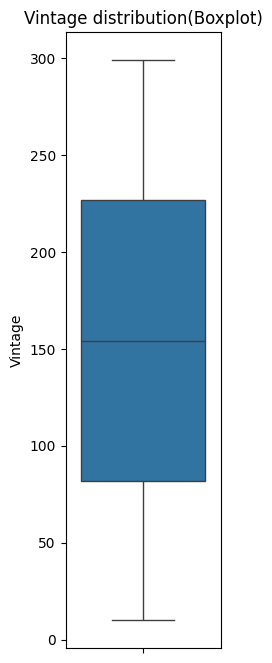

**************************************************



In [25]:
for num in numeric_features:
    print(num)
    gen_info_feat(df,num)
    

#### Inference
- Annul Premium has a skewness that need to be transformed and kurtosis that need to be capped.
- Annual Premium also has a lot of outliers
- the age of a large number of population is in 20s and 30s

Vehicle_Age
Description:
count       380840
unique           3
top       1-2 Year
freq        200167
Name: Vehicle_Age, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
              Count  Frequency (%)
Vehicle_Age                       
1-2 Year     200167      52.559343
< 1 Year     164671      43.238893
> 2 Years     16002       4.201765


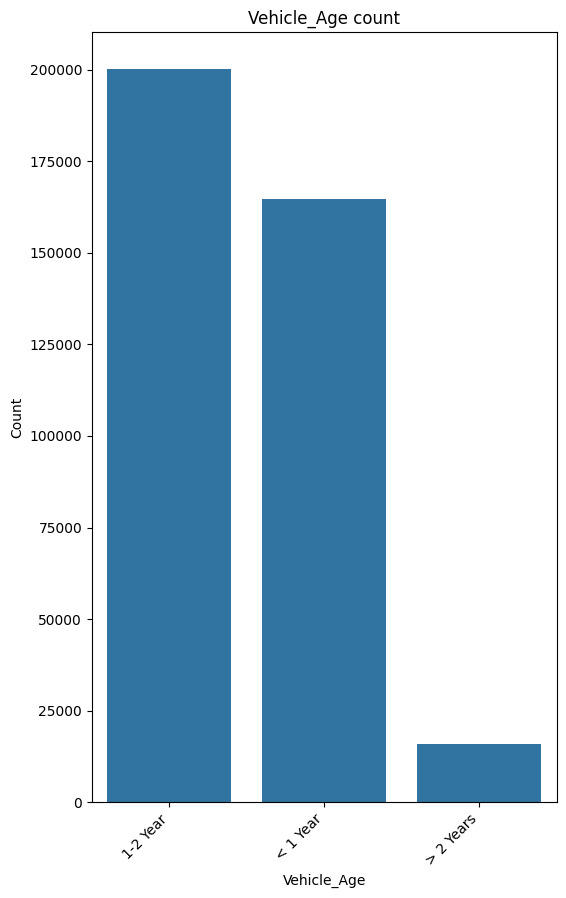

**************************************************

Gender
Description:
count     380840
unique         2
top         Male
freq      205938
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
         Count  Frequency (%)
Gender                       
Male    205938      54.074677
Female  174902      45.925323


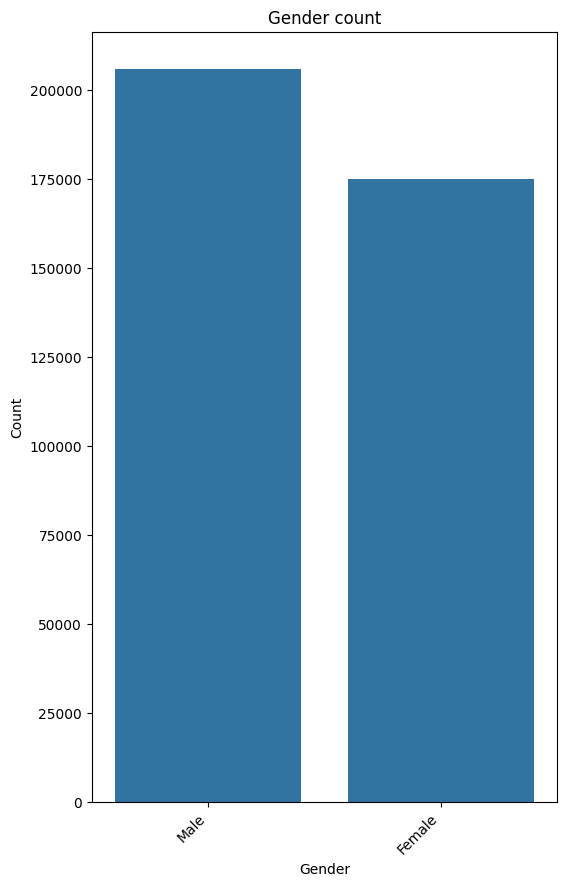

**************************************************

Vehicle_Damage
Description:
count     380840
unique         2
top          Yes
freq      192277
Name: Vehicle_Damage, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
                 Count  Frequency (%)
Vehicle_Damage                       
Yes             192277      50.487606
No              188563      49.512394


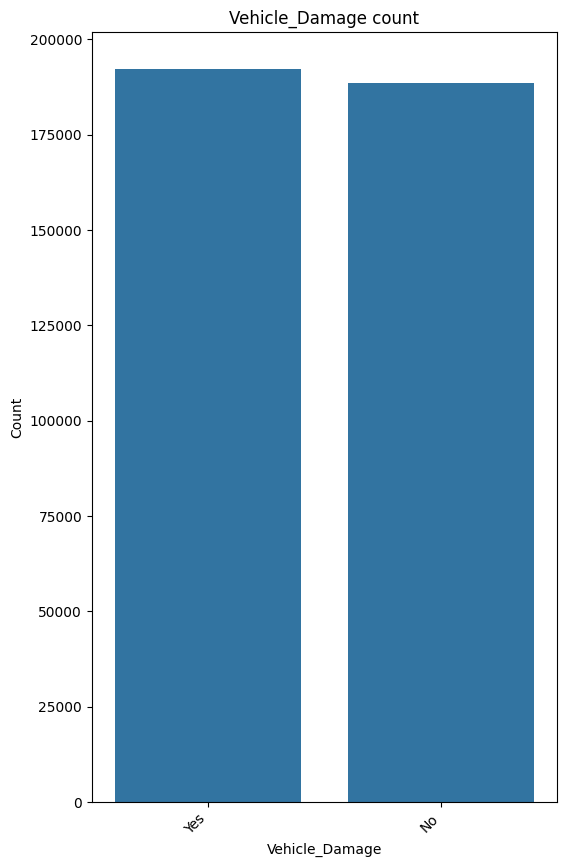

**************************************************

Driving_License
Description:
count   380840.000000
mean         0.997868
std          0.046126
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Driving_License, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                  Count  Frequency (%)
Driving_License                       
1                380028      99.786787
0                   812       0.213213


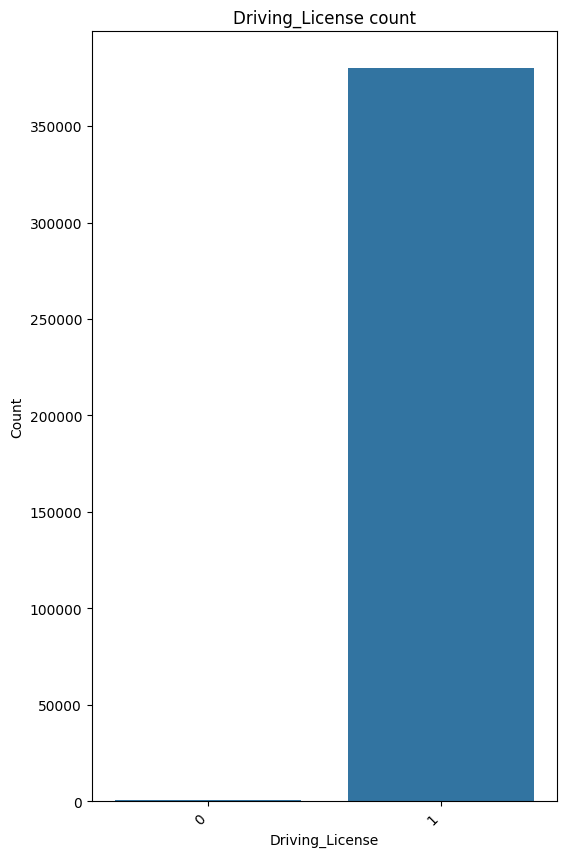

**************************************************

Previously_Insured
Description:
count   380840.000000
mean         0.458208
std          0.498251
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Previously_Insured, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
                     Count  Frequency (%)
Previously_Insured                       
0                   206336      54.179183
1                   174504      45.820817


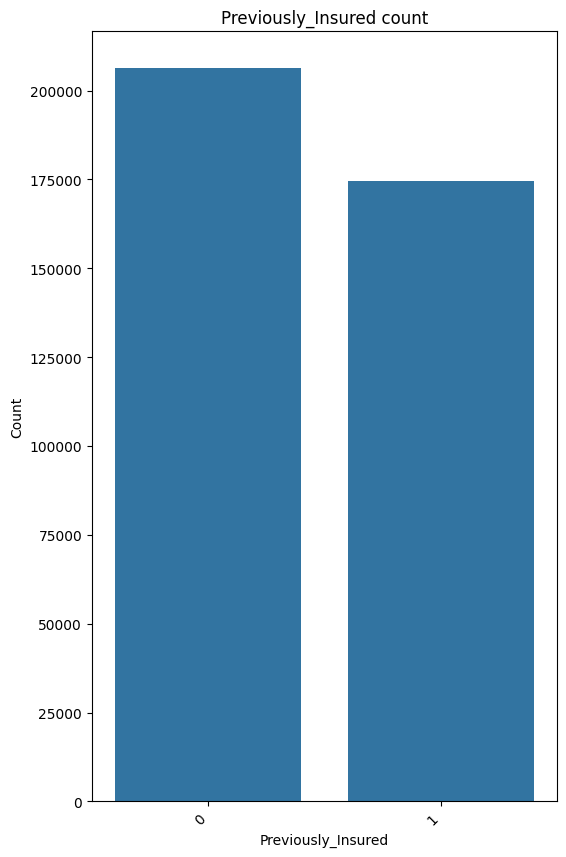

**************************************************

Response
Description:
count   380840.000000
mean         0.122584
std          0.327960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Response, dtype: float64
**************************************************
Object type:
int64
**************************************************
Value count:
           Count  Frequency (%)
Response                       
0         334155      87.741571
1          46685      12.258429


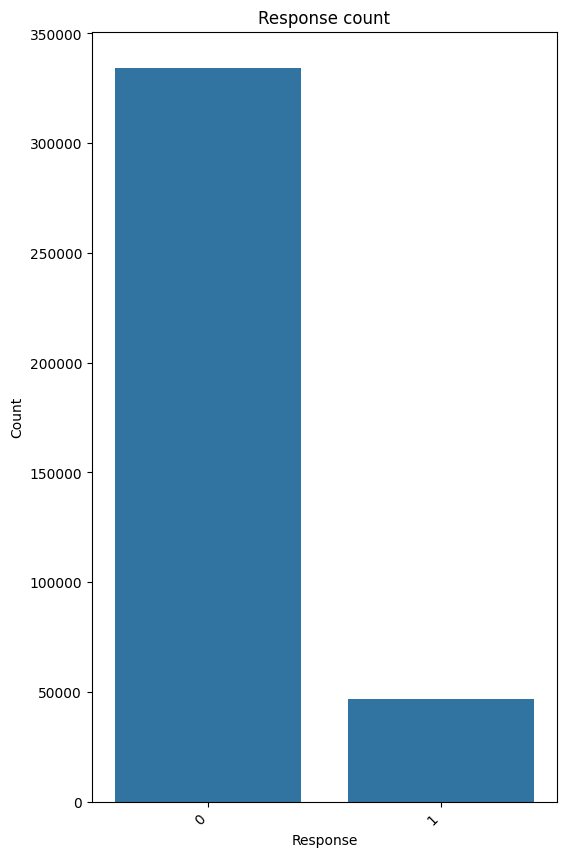

**************************************************



In [26]:
for num in cat_label_features:
    print(num)
    gen_info_feat(df,num)

#### Inference
- There are very low number of people without driving license
- The target, Responses,  has more negative response than positive responses which indicates that the dataset is Imbalaced.
- The population's Vehicle Age lies in the range of 0-2 years.
- Only 12.25 percent of the data contains positive responders

In [27]:
for num in cat_encoded_feature:
    print(num)
    gen_info_feat(df,num)

Policy_Sales_Channel
Description:
count   380840.000000
mean       112.030225
std         54.206194
min          1.000000
25%         29.000000
50%        133.000000
75%        152.000000
max        163.000000
Name: Policy_Sales_Channel, dtype: float64
**************************************************
Object type:
float64
**************************************************
**************************************************

Region_Code
Description:
count   380840.000000
mean        26.388307
std         13.229907
min          0.000000
25%         15.000000
50%         28.000000
75%         35.000000
max         52.000000
Name: Region_Code, dtype: float64
**************************************************
Object type:
float64
**************************************************
**************************************************



In [28]:
'''
for num in cat_encoded_feature:
    plt.figure(figsize = (70,10))
    ax = plt.subplot(1,2, 1)
    plt.xticks(rotation = 90)
    sns.countplot(df[num])
    plt.show()
        '''

'\nfor num in cat_encoded_feature:\n    plt.figure(figsize = (70,10))\n    ax = plt.subplot(1,2, 1)\n    plt.xticks(rotation = 90)\n    sns.countplot(df[num])\n    plt.show()\n        '

#### Bivariate Analysis

In [29]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380840 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                380840 non-null  object 
 1   Age                   380840 non-null  int64  
 2   Driving_License       380840 non-null  int64  
 3   Region_Code           380840 non-null  float64
 4   Previously_Insured    380840 non-null  int64  
 5   Vehicle_Age           380840 non-null  object 
 6   Vehicle_Damage        380840 non-null  object 
 7   Annual_Premium        380840 non-null  float64
 8   Policy_Sales_Channel  380840 non-null  float64
 9   Vintage               380840 non-null  int64  
 10  Response              380840 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


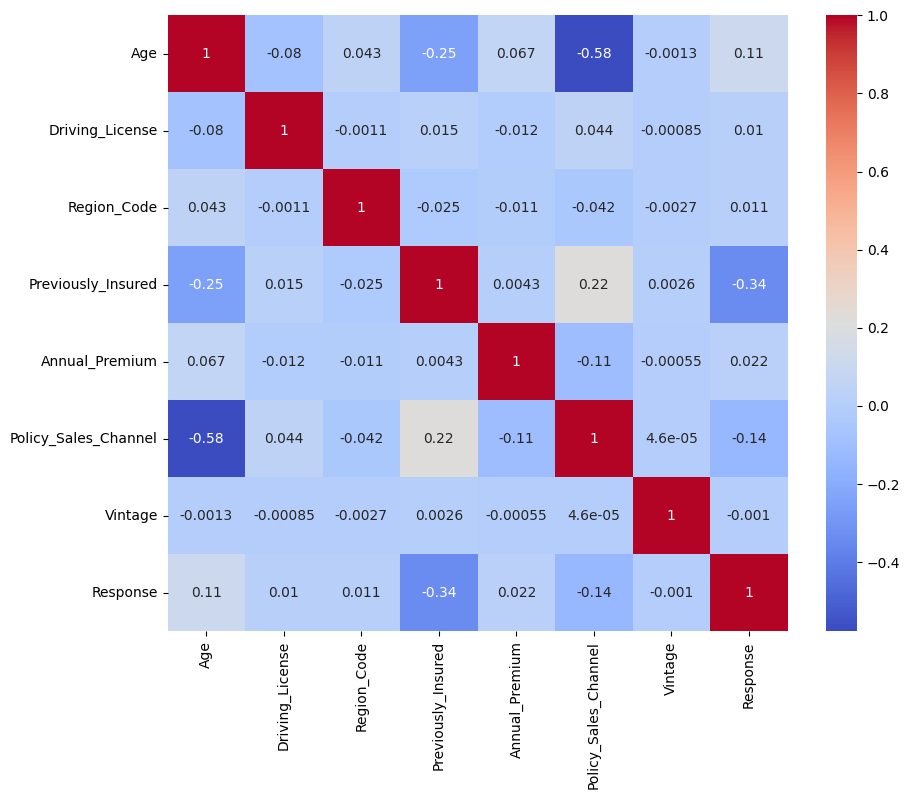

In [31]:
#using sns to plot correlation values between attributes in the dataset
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Inference
- No correlation is observed between numerical features.
- Age and Policy_sales_channel exhibit correlation of -0.58

### Bivariate Analysis

#### Response Variable relationship analysis

<Figure size 1800x400 with 0 Axes>

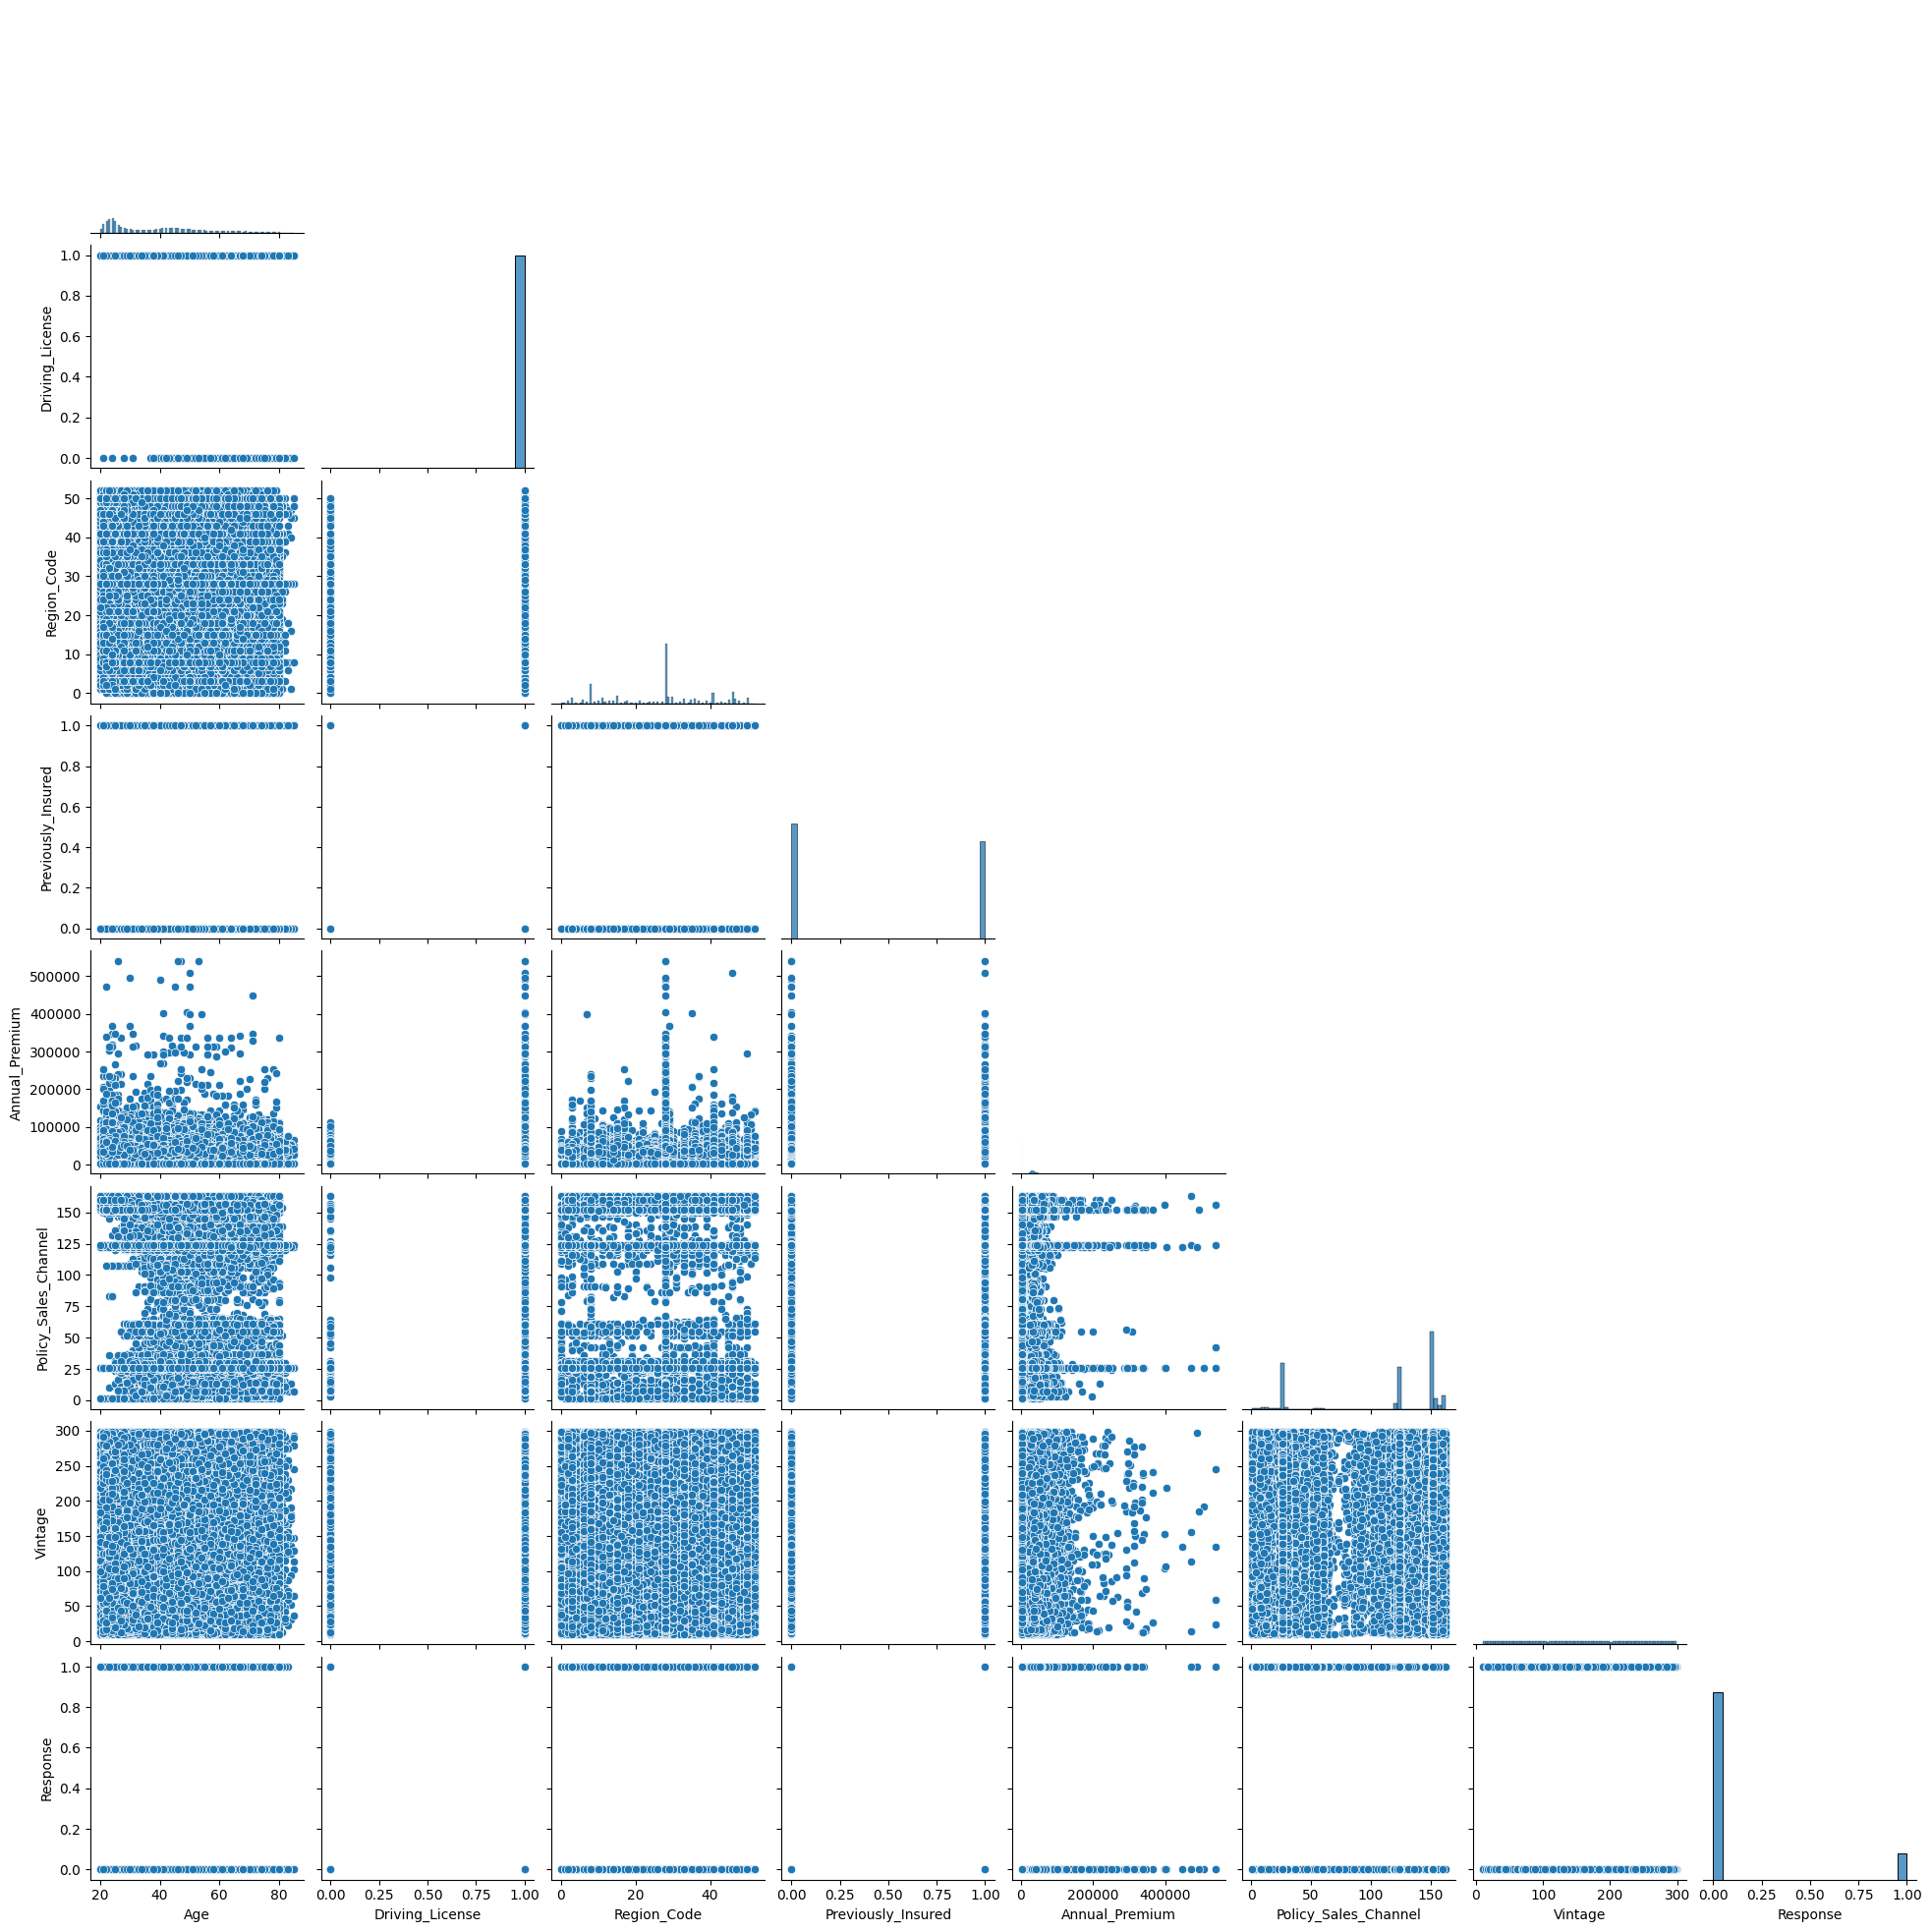

In [38]:
# scatter plot
plt.figure(figsize = (18, 4))
sns.pairplot(df,corner=True)
plt.show()

#### Inferences
- No strong linear relationships. this suggests that there is no simple linear relationship. tree based models may work better

In [67]:
numeric_features = ['Age','Annual_Premium', 'Vintage'] # numerical features
cat_encoded_feature = ['Policy_Sales_Channel','Region_Code'] # categorical features that were encoded numerically
cat_label_features = ['Vehicle_Age', 'Gender' ,'Vehicle_Damage','Driving_License','Previously_Insured'] # categorical features

In [41]:
# Visualizes how a numerical feature differs across target classes
# - Boxplot shows distribution shift and outliers between classes
# - Histograms show class-wise distribution overlap
# Helps assess feature separability and predictive power


# for numeric features
def plot_numeric_vs_target(df, num_feature, target):
    plt.figure(figsize=(18,4))

    # Boxplot (distribution shift)
    plt.subplot(1,3,1)
    sns.boxplot(x=target, y=num_feature, data=df)
    plt.title(f'{num_feature} vs {target}')

    # Histogram for positive class
    plt.subplot(1,3,2)
    sns.histplot(df[df[target] == 1][num_feature], kde=True)
    plt.title(f'{num_feature} | {target}=1')

    # Histogram for negative class
    plt.subplot(1,3,3)
    sns.histplot(df[df[target] == 0][num_feature], kde=True)
    plt.title(f'{num_feature} | {target}=0')

    plt.tight_layout()
    plt.show()

In [42]:
# Computes target (positive class) rate for each unique value of a numerical feature
# - Groups data by feature value
# - Calculates proportion of each target class
# Used to detect trends, prepare binning, and engineer monotonic features

def target_rate_by_numeric(df, num_feature, target):
    rate_df = (
        df
        .groupby(num_feature)[target]
        .value_counts(normalize=True)
        .rename('percentage')
        .reset_index()
        .sort_values(num_feature)
    )
    
    return rate_df

In [43]:
# Plots how target rate changes across values of a numerical feature
# - Uses only positive class proportion
# - Helps identify nonlinear patterns and optimal bin boundaries
# Useful for EDA and feature transformation decisions


def plot_target_rate(df, num_feature, target):
    rate_df = target_rate_by_numeric(df, num_feature, target)
    
    positive = rate_df[rate_df[target] == 1]

    plt.figure(figsize=(12,4))
    sns.lineplot(x=num_feature, y='percentage', data=positive, marker='o')
    plt.title(f'{target} rate by {num_feature}')
    plt.ylim(0,1)
    plt.show()

#### Age

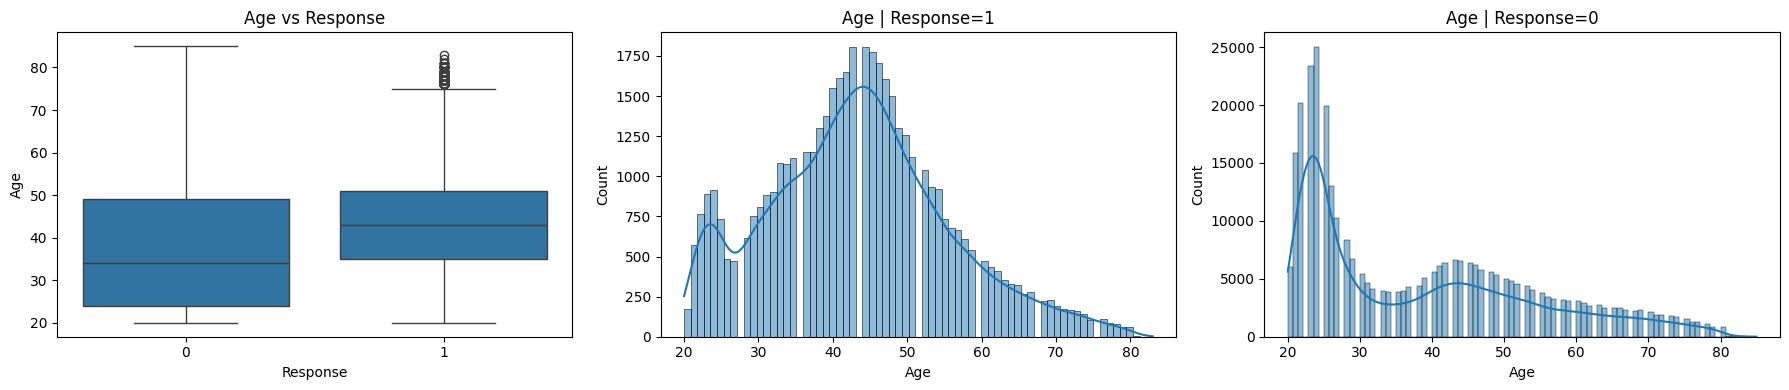

In [47]:

plot_numeric_vs_target(df, 'Age', 'Response')
#target_rate_by_numeric(df, 'Age', 'Response')

##### Annual Premium

In [55]:
def plot_numeric_zoomed(df, num_feature, target, min_val=None, max_val=None):
    data = df.copy()

    if min_val is not None:
        data = data[data[num_feature] > min_val]
    if max_val is not None:
        data = data[data[num_feature] < max_val]

    plt.figure(figsize=(18,4))

    # Boxplot
    plt.subplot(1,3,1)
    sns.boxplot(x=target, y=num_feature, data=data)
    plt.title(f'{num_feature} vs {target}')

    # Overlayed distributions
    plt.subplot(1,3,2)
    sns.histplot(data[data[target]==1][num_feature], label='Yes', kde=True)
    sns.histplot(data[data[target]==0][num_feature], label='No', kde=True)
    plt.legend()
    plt.title('Class distributions')

    # Zoomed clean histogram
    plt.subplot(1,3,3)
    sns.histplot(data[num_feature], kde=True)
    plt.title('Filtered feature range')

    plt.tight_layout()
    plt.show()


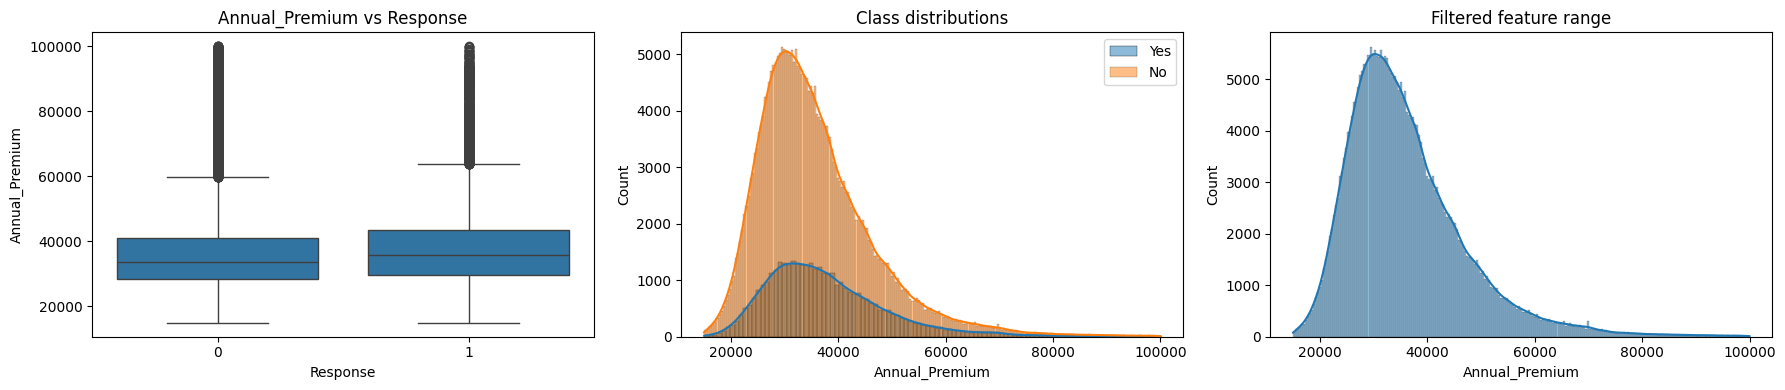

In [57]:
plot_numeric_zoomed(
    df,
    num_feature='Annual_Premium',
    target='Response',
    min_val=15000,
    max_val=100000
)


In [65]:
def plot_categorical_stacked_target(df, cat_feature, target):
    plt.figure(figsize=(10,4))
    
    sns.countplot(
        data=df,
        x=cat_feature,
        hue=target
    )

    plt.title(f'{cat_feature} count split by {target}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.xlabel(cat_feature)

    plt.tight_layout()
    plt.show()

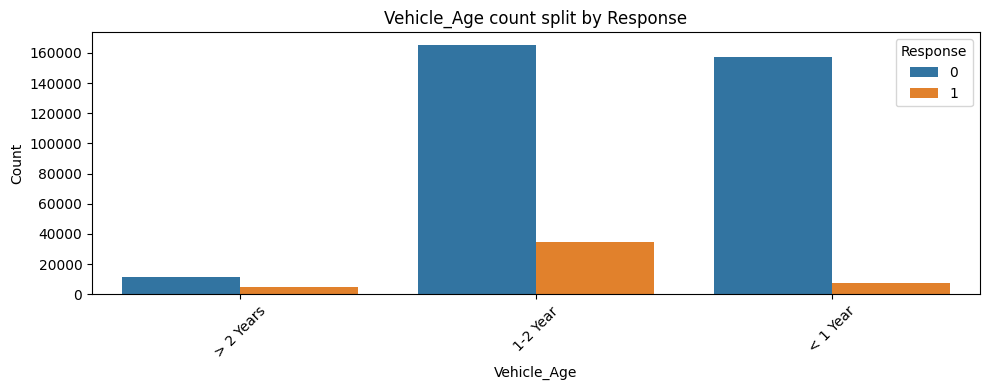

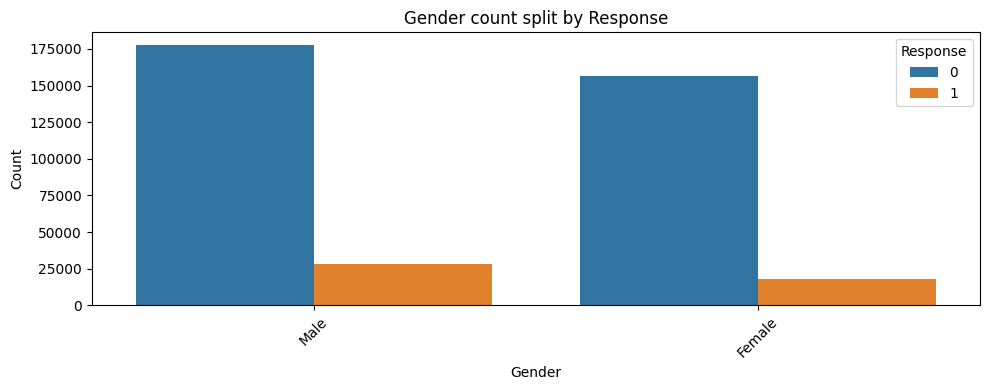

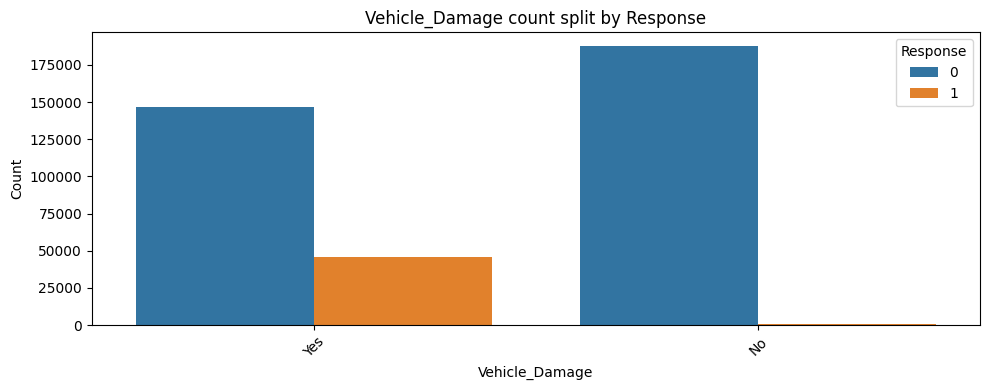

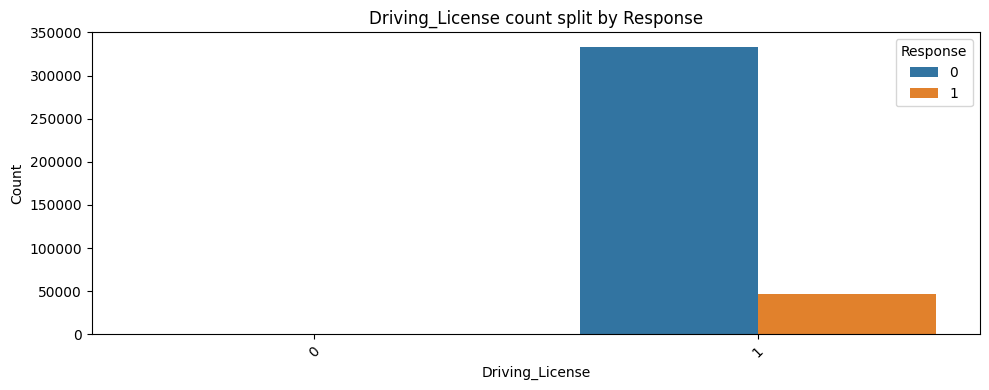

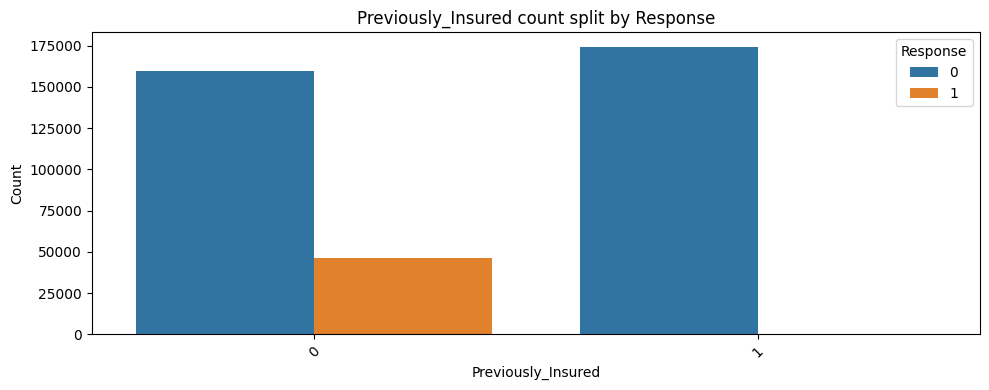

In [68]:
for col in cat_label_features:
    plot_categorical_stacked_target(df, col, 'Response')

#### Inference
- A very large amount of positive respondents have had previous vehicle damage.

- people who opt for insurance usually dont hold a vehicle insurance currently. Although, there are some who do get an insurance while being insured previously. One reason could be that their previous insurance would have been about to expire

- Proportion of people that opt for insurance is lowest for people with vehicle age less than a year. This could be because they already hold a policy elsewhere. While we can observe there's higher chance a person with a vehicle age over a year would opt in for vehicle insurance


In [70]:
def plot_split_stacked_target(df, cat_feature, target):
    # Build proportion table
    prop_df = (
        pd.crosstab(df[cat_feature], df[target], normalize='index')
        .reset_index()
    )

    # Ensure both classes exist
    if 0 not in prop_df.columns:
        prop_df[0] = 0
    if 1 not in prop_df.columns:
        prop_df[1] = 0

    prop_df = prop_df.sort_values(1, ascending=False)

    plt.figure(figsize=(10,4))

    plt.bar(prop_df[cat_feature], prop_df[0], label='No')
    plt.bar(prop_df[cat_feature], prop_df[1], 
            bottom=prop_df[0], label='Yes')

    plt.ylim(0,1)
    plt.xticks(rotation=45)
    plt.ylabel('Proportion')
    plt.title(f'{target} distribution by {cat_feature}')
    plt.legend()

    plt.tight_layout()
    plt.show()

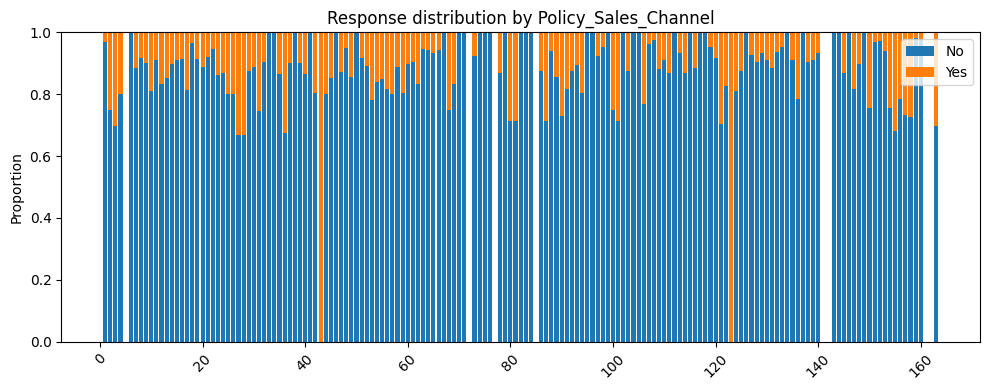

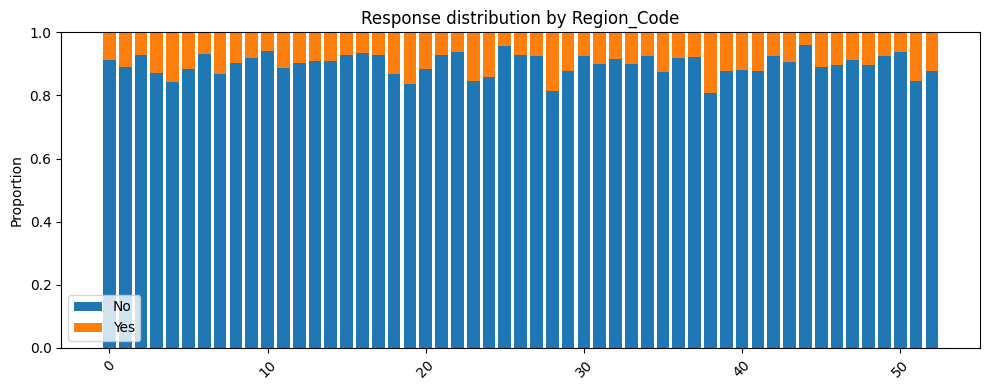

In [71]:
for col in cat_encoded_feature:
    plot_split_stacked_target(df, col, 'Response')

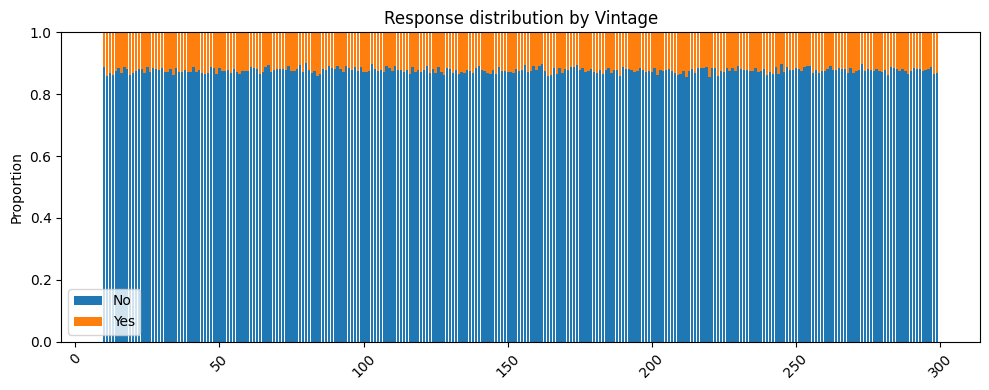

In [72]:
plot_split_stacked_target(df, 'Vintage', 'Response')

#### Multivariate Analysis

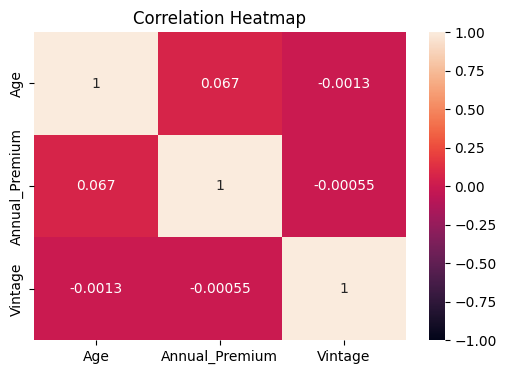

In [74]:
# Continuous variables
plt.figure(figsize = (6,4))
corr_heatmap = df[['Age','Annual_Premium', 'Vintage']].corr()
heatmap = sns.heatmap(corr_heatmap, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap');

In [76]:
from scipy import stats
from scipy.stats import chi2_contingency

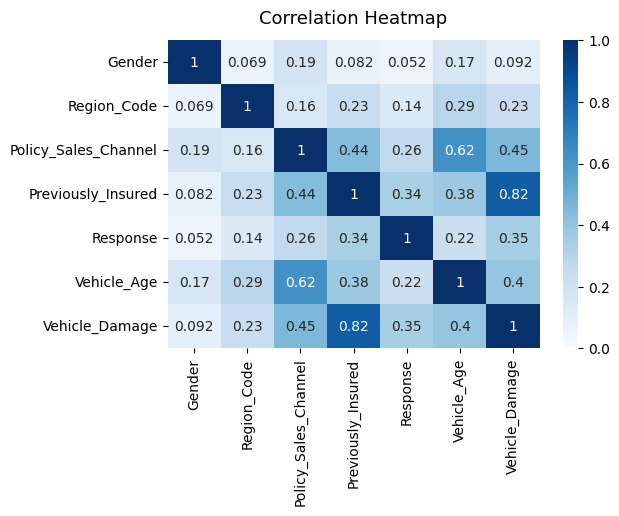

In [77]:
# Categorical variables
# Calculate cramer V
cat_attributes = ['Gender','Region_Code', 'Policy_Sales_Channel', 'Previously_Insured', 'Response', 'Vehicle_Age', 'Vehicle_Damage']

cramer_matrix = []
for i in cat_attributes:
    cramer_list = []
    for j in cat_attributes:
        cramer_list.append(cramer_v(df[i], df[j]))
    cramer_matrix.append(cramer_list)
        
        
cat_corr = pd.DataFrame({'Gender': cramer_matrix[0],
                         'Region_Code': cramer_matrix[1],
                         'Policy_Sales_Channel': cramer_matrix[2],
                         'Previously_Insured': cramer_matrix[3],
                         'Response': cramer_matrix[4],
                         'Vehicle_Age': cramer_matrix[5],
                         'Vehicle_Damage': cramer_matrix[6]})

cat_corr = cat_corr.set_index(cat_corr.columns)

plt.figure(figsize=(6, 4) )
plt.title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12);
sns.heatmap(cat_corr, vmin=0, vmax=1, annot=True, cmap='Blues');

### Categorical Feature Correlations (Cramér’s V)

Cramér’s V was used to measure associations between categorical variables.  
Values closer to 1 indicate stronger relationships.

Overall, most features show weak to moderate association, with a few very strong dependencies.

### Strong Relationships Between Predictors

- Previously_Insured and Vehicle_Damage show a very strong association (0.82)
- Policy_Sales_Channel and Vehicle_Age show very strong dependency (0.62)

These features likely contain overlapping information and may introduce redundancy in models.
Feature selection or regularization may be beneficial.

### Features Most Associated with Target Variable (Response)

The strongest associations with Response are:

- Vehicle_Damage (0.35)
- Previously_Insured (0.34)
- Policy_Sales_Channel (0.26)
- Vehicle_Age (0.22)

These categorical features are likely strong predictors of customer response behavior.

### Weakly Related Features

- Gender shows almost no association with other features or the target
- Region_Code shows only weak to moderate relationships

These variables may contribute limited predictive value.


### Modeling Implications

- Strong multicollinearity exists among some categorical features
- Tree-based models can naturally handle this
- Linear models may require feature selection or regularization

Key focus should be on Vehicle_Damage, Previously_Insured, Policy_Sales_Channel, and Vehicle_Age.


In [78]:
df.Vehicle_Age.value_counts()*100/df.shape[0]

Vehicle_Age
1-2 Year    52.559343
< 1 Year    43.238893
> 2 Years    4.201765
Name: count, dtype: float64

In [79]:
df.Region_Code.value_counts()*100/df.shape[0]

Region_Code
28.000000   27.921174
8.000000     8.890085
46.000000    5.185117
41.000000    4.793614
15.000000    3.492280
30.000000    3.197406
29.000000    2.902006
50.000000    2.688005
3.000000     2.427529
11.000000    2.423327
36.000000    2.307531
33.000000    2.007930
47.000000    1.952001
35.000000    1.822025
6.000000     1.648199
45.000000    1.471222
37.000000    1.444439
18.000000    1.352274
14.000000    1.228075
48.000000    1.222036
39.000000    1.218885
10.000000    1.147989
21.000000    1.120155
2.000000     1.060025
13.000000    1.059237
7.000000     0.859941
12.000000    0.839460
9.000000     0.814253
27.000000    0.740206
32.000000    0.731016
43.000000    0.692942
17.000000    0.686903
26.000000    0.679288
25.000000    0.656969
24.000000    0.634125
38.000000    0.531982
0.000000     0.529094
16.000000    0.526468
23.000000    0.514389
31.000000    0.511501
20.000000    0.507037
49.000000    0.480779
4.000000     0.472114
34.000000    0.436666
19.000000    0.40305

In [80]:
df.Policy_Sales_Channel.value_counts()*100/df.shape[0]

Policy_Sales_Channel
152.000000   35.363932
26.000000    20.913244
124.000000   19.411826
160.000000    5.716049
156.000000    2.794349
122.000000    2.607132
157.000000    1.753230
154.000000    1.573364
151.000000    1.019851
163.000000    0.759637
13.000000     0.489707
25.000000     0.484981
7.000000      0.419336
8.000000      0.397805
30.000000     0.370234
55.000000     0.331898
155.000000    0.324021
11.000000     0.315881
1.000000      0.282008
52.000000     0.277019
125.000000    0.269404
15.000000     0.232381
29.000000     0.221353
12.000000     0.205598
120.000000    0.201922
24.000000     0.196933
31.000000     0.165686
14.000000     0.163323
153.000000    0.159385
61.000000     0.152032
3.000000      0.137328
16.000000     0.137328
60.000000     0.135753
4.000000      0.133652
158.000000    0.129188
23.000000     0.110808
22.000000     0.087176
150.000000    0.081924
10.000000     0.069320
19.000000     0.058292
136.000000    0.048577
147.000000    0.048314
109.000000   